In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('cleaned_data_for_ml_modelling.csv',index_col=0)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,avg_price_energy,avg_price_power,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua,channel_sales_lmkebamcaaclubfxadlmueccxoimlema,channel_sales_unknown,channel_sales_usilxuppasemubllopkaafesmlibmsdf
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,2012.11,2016.11,2012.11,2015.11,26520.30,10025,...,0.087602,34.550147,0,1,0,0,0,1,0,0
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013.06,2016.06,2013.11,2015.06,0.00,0,...,0.099190,27.093347,0,0,1,0,1,0,0,0
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009.08,2016.08,2009.08,2015.08,189.95,0,...,0.049978,14.771805,1,0,0,0,0,0,1,0
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,2010.04,2016.04,2010.04,2015.04,47.96,0,...,0.086311,14.795150,1,0,0,0,1,0,0,0
4,bba03439a292a1e166f80264c16191cb,1584,0,0,2010.03,2016.03,2010.03,2015.03,240.04,0,...,0.050403,14.800088,1,0,0,0,0,1,0,0


In [3]:
df.shape

(16094, 34)

<AxesSubplot:>

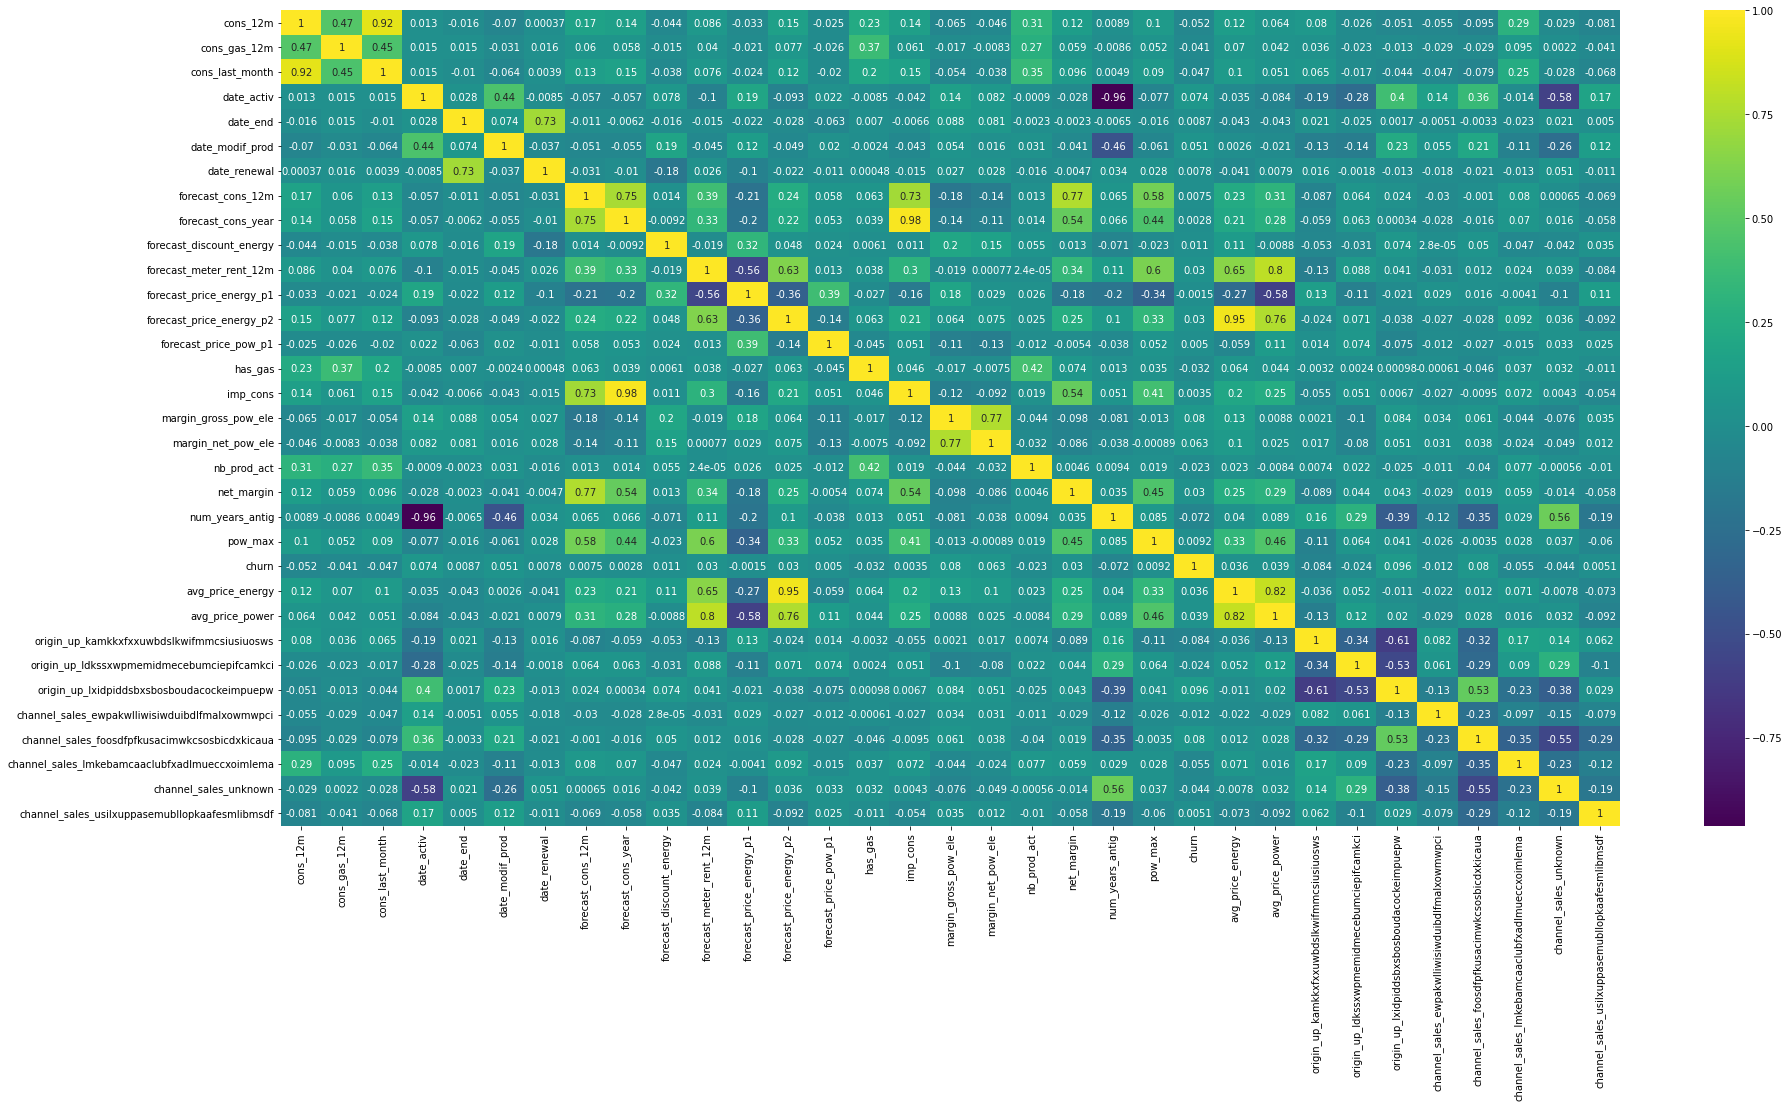

In [4]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [5]:
## Finding columns which have high coorelation.

temp=df.corr()
corr=[]
for i in temp.columns.to_list():
    for j in temp.index.to_list():
        if i!=j:
            if temp.loc[i,j]>0.75:
                if tuple([j,i,temp.loc[i,j]]) not in corr:
                    corr.append((i,j,temp.loc[i,j]))


In [6]:
len(corr)

8

In [7]:
len(df.columns.to_list())

34

In [8]:
num_features=df.loc[:,df.columns!='has_gas'].iloc[:,0:25].drop(['id','churn'],axis=1)

In [9]:
num_features.columns

Index(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end',
       'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'avg_price_energy',
       'avg_price_power'],
      dtype='object')

In [10]:
corr

[('cons_12m', 'cons_last_month', 0.9195447628364727),
 ('forecast_cons_12m', 'net_margin', 0.768805633060912),
 ('forecast_cons_year', 'imp_cons', 0.9817315079431549),
 ('forecast_meter_rent_12m', 'avg_price_power', 0.8044835205336386),
 ('forecast_price_energy_p2', 'avg_price_energy', 0.9540118862487248),
 ('forecast_price_energy_p2', 'avg_price_power', 0.7632880427528527),
 ('margin_gross_pow_ele', 'margin_net_pow_ele', 0.7665008917243943),
 ('avg_price_energy', 'avg_price_power', 0.824813918777804)]

In [11]:
## To select the feature which has high variance out of two highly coorelated features.
num_features.std().sort_values(ascending=False)

cons_12m                    679553.964296
cons_gas_12m                177599.134679
cons_last_month              82361.588164
forecast_cons_year            5257.648434
forecast_cons_12m             4035.249847
imp_cons                       494.392863
net_margin                     366.522958
forecast_meter_rent_12m         79.024274
margin_net_pow_ele              27.906778
margin_gross_pow_ele            23.691483
pow_max                         21.754891
avg_price_power                  6.799253
forecast_price_pow_p1            5.192578
forecast_discount_energy         5.141778
date_modif_prod                  2.497630
date_activ                       1.709003
num_years_antig                  1.675468
nb_prod_act                      1.459894
date_renewal                     0.290780
date_end                         0.242757
forecast_price_energy_p2         0.048517
forecast_price_energy_p1         0.026158
avg_price_energy                 0.024589
dtype: float64

In [12]:
## Two drop the features that have less variance than its coorelated feature.
drop=['cons_last_month','imp_cons','forecast_price_energy_p2']

In [13]:
df.drop(drop,axis=1,inplace=True)

## Calculating Feature-Importance using RandomForest

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
X=df.drop(['id','churn'],axis=1)
y=df['churn']

In [16]:
StratifiedSplit=StratifiedShuffleSplit(test_size=0.2,random_state=0)

In [17]:
for train_index,test_index in StratifiedSplit.split(X,y):
    X_train,X_test=X.loc[train_index],X.loc[test_index]
    y_train,y_test=y.loc[train_index],y.loc[test_index]

In [18]:
rf=RandomForestClassifier(n_estimators=500,random_state=0)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score,roc_auc_score

In [20]:
accuracy_score(y_test,y_pred),roc_auc_score(y_test,y_pred)

(0.9074246660453557, 0.5398902821316615)

In [21]:
accuracy_score(y_train,rf.predict(X_train)),roc_auc_score(y_train,rf.predict(X_train))

(1.0, 1.0)

In [22]:
rf.feature_importances_

array([0.08184775, 0.01722057, 0.04761009, 0.03401827, 0.04929014,
       0.0342726 , 0.07459129, 0.05375183, 0.00301794, 0.07509423,
       0.04932562, 0.01274881, 0.00556656, 0.07020147, 0.0707188 ,
       0.01049549, 0.07830094, 0.01770491, 0.05611612, 0.06791117,
       0.04418862, 0.00584263, 0.00545527, 0.0075878 , 0.00361777,
       0.00844846, 0.00434163, 0.00513534, 0.0055779 ])

In [23]:
rf.feature_importances_.shape

(29,)

In [24]:
fi_values=dict(zip(X_train.columns.to_list(),rf.feature_importances_))
fi_values

{'cons_12m': 0.0818477487946438,
 'cons_gas_12m': 0.017220569419984337,
 'date_activ': 0.04761009233386401,
 'date_end': 0.03401827383361208,
 'date_modif_prod': 0.04929014030733001,
 'date_renewal': 0.03427259804266852,
 'forecast_cons_12m': 0.0745912908460371,
 'forecast_cons_year': 0.053751830336537375,
 'forecast_discount_energy': 0.003017940530671942,
 'forecast_meter_rent_12m': 0.07509423106367866,
 'forecast_price_energy_p1': 0.049325616255623345,
 'forecast_price_pow_p1': 0.01274880698341983,
 'has_gas': 0.005566556722304456,
 'margin_gross_pow_ele': 0.07020146548352081,
 'margin_net_pow_ele': 0.0707187964893934,
 'nb_prod_act': 0.010495492377807683,
 'net_margin': 0.07830094019982614,
 'num_years_antig': 0.017704913261014452,
 'pow_max': 0.05611612099114455,
 'avg_price_energy': 0.06791117436569527,
 'avg_price_power': 0.04418862249827879,
 'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws': 0.00584262965749876,
 'origin_up_ldkssxwpmemidmecebumciepifcamkci': 0.005455270482716891,
 '

In [25]:
## dropping columns that have feature importance value less than 0.006.
drop_cols=list(filter(lambda x:fi_values[x]<0.006,fi_values))
drop_cols

['forecast_discount_energy',
 'has_gas',
 'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws',
 'origin_up_ldkssxwpmemidmecebumciepifcamkci',
 'channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci',
 'channel_sales_lmkebamcaaclubfxadlmueccxoimlema',
 'channel_sales_unknown',
 'channel_sales_usilxuppasemubllopkaafesmlibmsdf']

In [26]:
df.shape

(16094, 31)

In [27]:
df.drop(drop_cols,axis=1,inplace=True)

In [28]:
df.shape

(16094, 23)

In [29]:
df.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'date_activ', 'date_end',
       'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_meter_rent_12m',
       'forecast_price_energy_p1', 'forecast_price_pow_p1',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max', 'churn', 'avg_price_energy',
       'avg_price_power', 'origin_up_lxidpiddsbxsbosboudacockeimpuepw',
       'channel_sales_foosdfpfkusacimwkcsosbicdxkicaua'],
      dtype='object')

In [30]:
df.describe()

,cons_12m,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,forecast_price_energy_p1,...,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,avg_price_energy,avg_price_power,origin_up_lxidpiddsbxsbosboudacockeimpuepw,channel_sales_foosdfpfkusacimwkcsosbicdxkicaua
count,1.609400e+04,1.609400e+04,16094.000000,16094.000000,16094.000000,16094.000000,16094.000000,16094.000000,16094.000000,16094.000000,...,16094.000000,16094.000000,16094.000000,16094.000000,16094.000000,16094.000000,16094.000000,16094.000000,16094.000000,16094.000000
mean,1.948281e+05,3.191560e+04,2010.611674,2016.127663,2012.491972,2015.109343,2370.850537,1907.584255,70.318682,0.135954,...,21.462596,1.347831,217.843290,5.030384,20.593876,0.099043,0.075359,20.156804,0.491550,0.458307
std,6.795540e+05,1.775991e+05,1.709003,0.242757,2.497630,0.290780,4035.249847,5257.648434,79.024274,0.026158,...,27.906778,1.459894,366.522958,1.675468,21.754891,0.298729,0.024589,6.799253,0.499944,0.498274
min,-1.252760e+05,-3.037000e+03,2000.070000,2006.080000,2000.070000,2013.060000,-16689.260000,-85627.000000,-242.960000,0.000000,...,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.909000e+03,0.000000e+00,2010.010000,2016.040000,2010.080000,2015.040000,513.370000,0.000000,16.230000,0.115237,...,11.950000,1.000000,52.012500,4.000000,12.500000,0.000000,0.049878,14.780335,0.000000,0.000000
50%,1.533450e+04,0.000000e+00,2011.030000,2016.070000,2013.040000,2015.070000,1179.425000,378.500000,19.440000,0.142881,...,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000,0.084637,14.814903,0.000000,0.000000
75%,5.022450e+04,0.000000e+00,2012.040000,2016.100000,2015.050000,2015.100000,2692.132500,1994.750000,131.470000,0.146348,...,29.640000,1.000000,275.670000,6.000000,19.800000,0.000000,0.099359,27.098285,1.000000,1.000000
max,1.609711e+07,4.188440e+06,2014.090000,2017.060000,2016.010000,2016.010000,103801.930000,175375.000000,2411.690000,0.273963,...,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000,0.148651,34.677296,1.000000,1.000000


In [31]:
def compareMedian(feature):
    ax=sns.pointplot(x='churn',y=feature,data=df,estimator=np.median)
    ax.set_title('Median Comparision')
    plt.show()

In [32]:
def compareMean(feature):
    bx=sns.pointplot(x='churn',y=feature,data=df)
    bx.set_title('Mean Comparision')
    plt.show()

# Relation between 'churn' and 'cons_12m'

## By below graphs we can infer that clients that have low consumption of electricity as compared to others, in past 12 months are likely to churn.

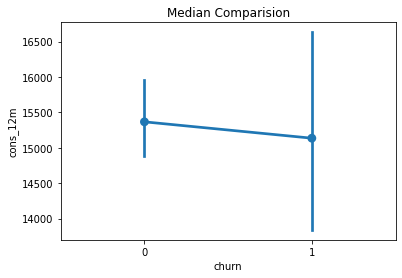

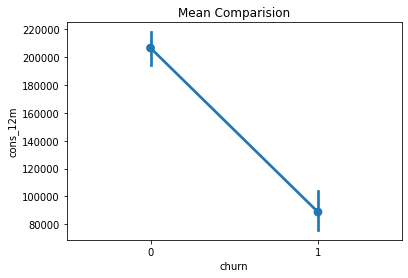

In [33]:
compareMedian('cons_12m')
compareMean('cons_12m')

# Relation between 'churn' and 'date_activ'

## Below graphs indicate that clients that activate the contract early , are less likely to churn.

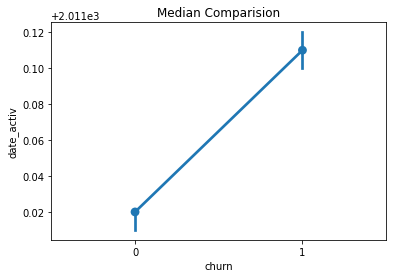

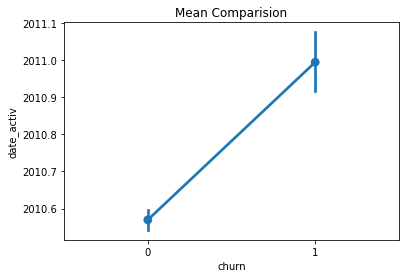

In [34]:
compareMedian('date_activ')
compareMean('date_activ')

In [35]:
df[df.date_activ<df.date_activ.median()].churn.mean()

0.07545045045045046

In [36]:
df[df.date_activ>=df.date_activ.median()].churn.mean()

0.12231547765983708

# Relation between 'churn' and 'date_modif_prod'

## Clients that have modified their product after 2013 are likely to churn.

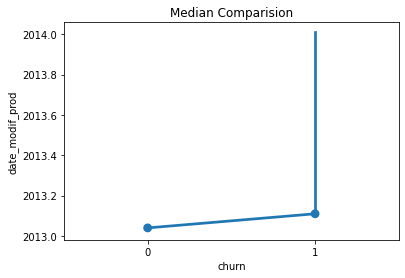

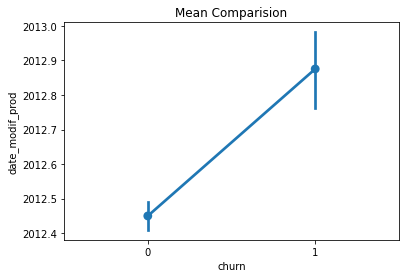

In [37]:
compareMedian('date_modif_prod')
compareMean('date_modif_prod')

In [38]:
df[df.date_modif_prod>df.date_modif_prod.median()].churn.mean()

0.11368184092046023

In [39]:
df[df.date_modif_prod<=df.date_modif_prod.median()].churn.mean()

0.08458878735490244

# Relation between 'churn' and 'forecast_meter_rent_12m'

## Clients for which 'forecast_meter_rent_12m' was high as compared to others, were likely to churn.

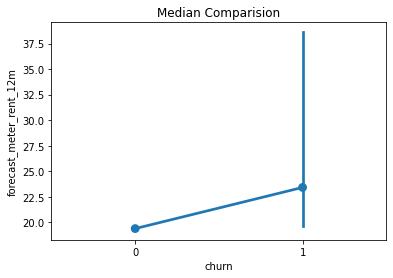

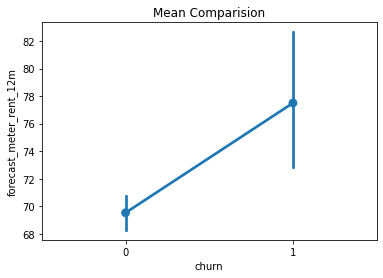

In [40]:
compareMedian('forecast_meter_rent_12m')
compareMean('forecast_meter_rent_12m')

In [41]:
df[df.forecast_meter_rent_12m<df.forecast_meter_rent_12m.median()].churn.mean()

0.09011808576755749

In [42]:
df[df.forecast_meter_rent_12m>=df.forecast_meter_rent_12m.median()].churn.mean()

0.10796372220151572

# Relation between 'margin on power subsrciption' and 'churn'

## It is evident by below two graphs that clients for which margin of power supply company on power subscription is high are more likely to churn.

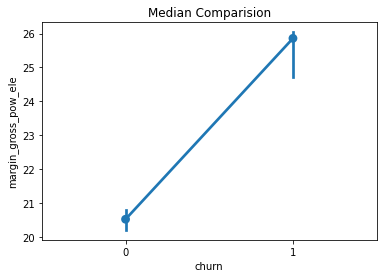

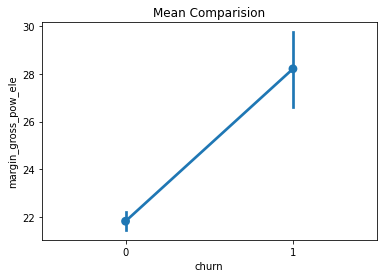

In [43]:
compareMedian('margin_gross_pow_ele')
compareMean('margin_gross_pow_ele')

In [44]:
df[df.margin_gross_pow_ele<df.margin_gross_pow_ele.median()].churn.mean()

0.07452102513062951

In [45]:
df[df.margin_gross_pow_ele>df.margin_gross_pow_ele.median()].churn.mean()

0.12432500313952029

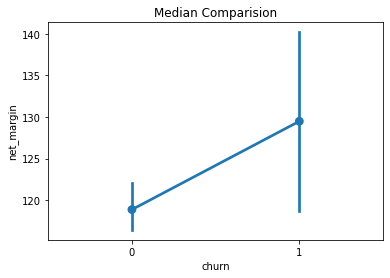

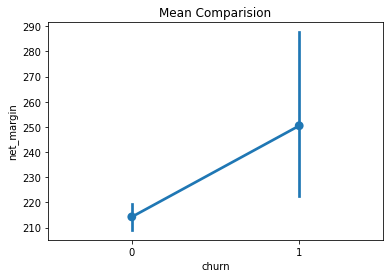

In [46]:
compareMedian('net_margin')
compareMean('net_margin')

In [47]:
df[df.net_margin>df.net_margin.median()].churn.mean()

0.10324667247170045

In [48]:
df[df.net_margin<=df.net_margin.median()].churn.mean()

0.09484792054624457

## We can infer from above graphs that clients from which power supply company is earning high profit are more likely to churn.

# Relation between 'power subscription' and 'churn' 

## Clients which have a high power subscription are more likely to churn.

In [49]:
df[df.pow_max>df.pow_max.median()].churn.mean()

0.10888175494917068

In [50]:
df[df.pow_max<=df.pow_max.median()].churn.mean()

0.09050823857043397

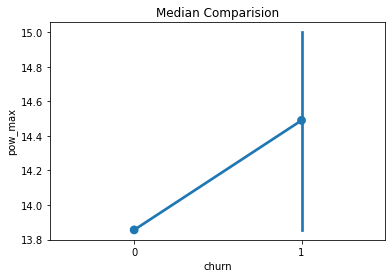

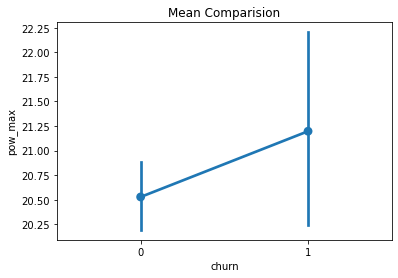

In [51]:
compareMedian('pow_max')
compareMean('pow_max')

# Relation between 'avg_price' and 'churn'

## We can see by below graphs that clients for which 'avg_price' was high are more likely to churn than clients that have comparetively less 'avg_price' to pay.

## This shows that the assumption of PowerCo was correct to some extent that churn rate is high due to price sensitivity of clients.

## Thus giving discounts would surely help in reducing churn rate, but it can affect the companies revenue collection.

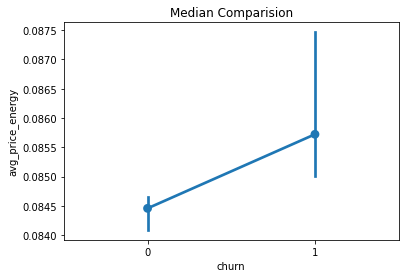

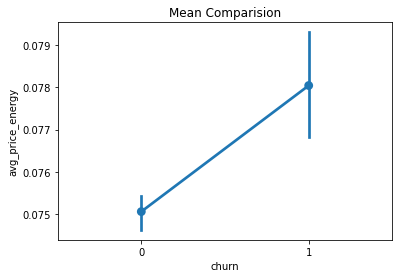

In [52]:
compareMedian('avg_price_energy')
compareMean('avg_price_energy')

In [53]:
df[df.avg_price_energy>df.avg_price_energy.median()].churn.mean()

0.10691509315993497

In [54]:
df[df.avg_price_energy<=df.avg_price_energy.median()].churn.mean()

0.09126837100160554

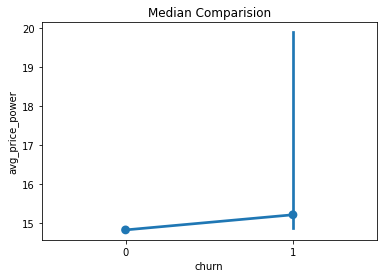

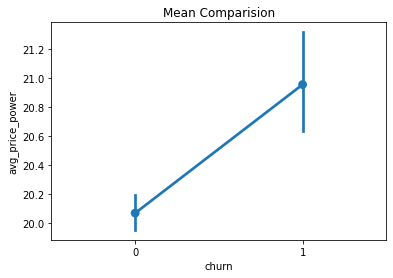

In [55]:
compareMedian('avg_price_power')
compareMean('avg_price_power')

In [56]:
df[df.avg_price_power>df.avg_price_power.median()].churn.mean()

0.11262581220537649

In [57]:
df[df.avg_price_power<df.avg_price_power.median()].churn.mean()

0.08488720824097014

# Realtion between 'num_years_antig' and 'churn'

## These graphs show that older clients are less likely to churn while new clients that have been customers for 4 years or less are more likely to churn.

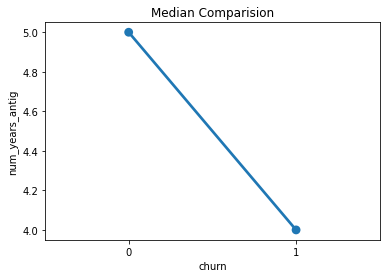

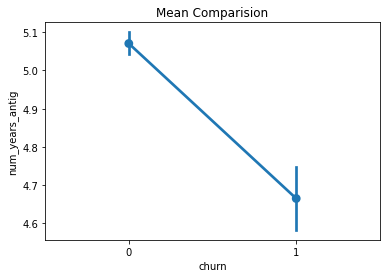

In [58]:
compareMedian('num_years_antig')
compareMean('num_years_antig')

In [59]:
df[df.num_years_antig>df.num_years_antig.median()].churn.mean()

0.07246153846153847

In [60]:
df[df.num_years_antig<df.num_years_antig.median()].churn.mean()

0.12762360895900832

# Relation between 'channel_sales code' and 'churn'

## Below graphs shows that clients that have subscribed through 'foosdfpfkusacimwkcsosbicdxkicaua' this channel are more likely to churn than clients subscribed through other channels.

<AxesSubplot:xlabel='channel_sales_foosdfpfkusacimwkcsosbicdxkicaua', ylabel='count'>

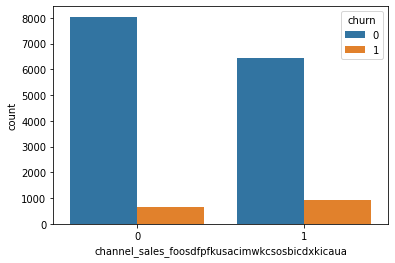

In [61]:
sns.countplot(x='channel_sales_foosdfpfkusacimwkcsosbicdxkicaua',hue='churn',data=df)

In [62]:
df[df.channel_sales_foosdfpfkusacimwkcsosbicdxkicaua==1].churn.mean()

0.125

In [63]:
df[df.channel_sales_foosdfpfkusacimwkcsosbicdxkicaua==0].churn.mean()

0.07708189951823813

# Relation between 'origin_up' and 'churn'

## The graph shows that clients that subscribed to this ('lxidpiddsbxsbosboudacockeimpuepw') code of electricity campaign, are more likely to churn, than clients who subscribed to other code of electricity campaign.

<AxesSubplot:xlabel='origin_up_lxidpiddsbxsbosboudacockeimpuepw', ylabel='count'>

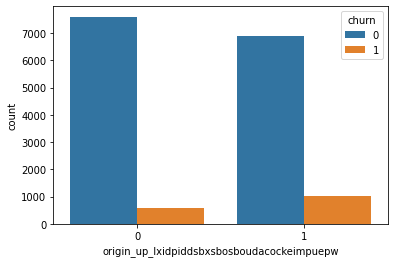

In [64]:
sns.countplot(x='origin_up_lxidpiddsbxsbosboudacockeimpuepw',hue='churn',data=df)

In [65]:
df[df.origin_up_lxidpiddsbxsbosboudacockeimpuepw==1].churn.mean()

0.12830236379724436

In [66]:
df[df.origin_up_lxidpiddsbxsbosboudacockeimpuepw==0].churn.mean()

0.07075644629109129

<AxesSubplot:>

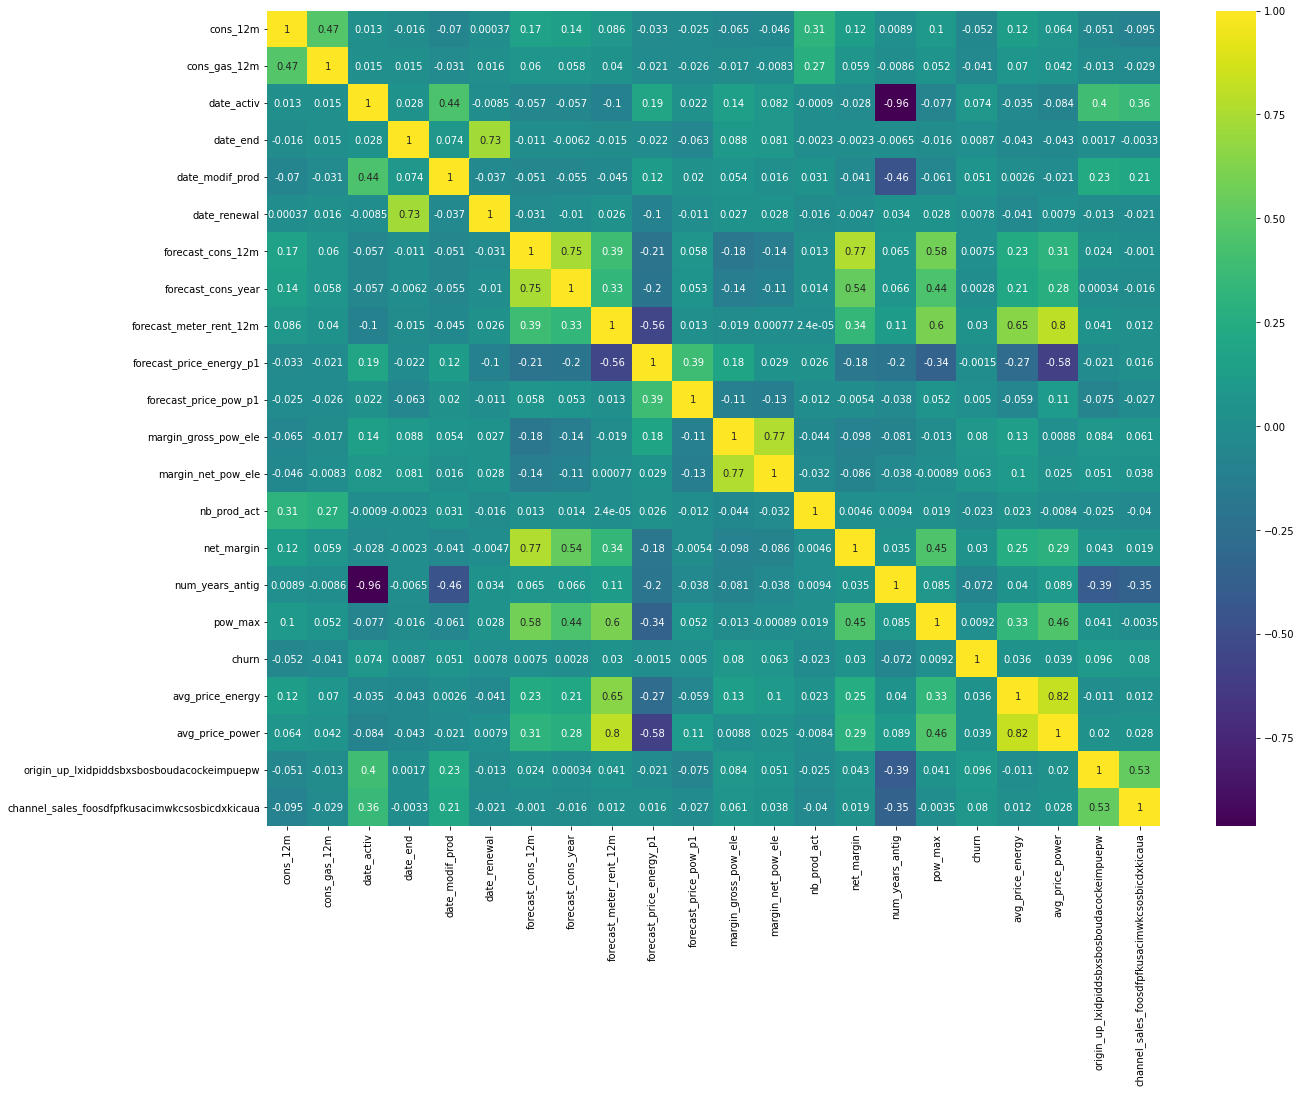

In [67]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [68]:
temp1=df.corr()
corr1=[]
for i in temp1.columns.to_list():
    for j in temp1.index.to_list():
        if i!=j:
            if temp1.loc[i,j]>0.70:
                if tuple([j,i,temp1.loc[i,j]]) not in corr1:
                    corr1.append((i,j,temp1.loc[i,j]))

In [69]:
corr1

[('date_end', 'date_renewal', 0.7280188930927894),
 ('forecast_cons_12m', 'forecast_cons_year', 0.7460714847955996),
 ('forecast_cons_12m', 'net_margin', 0.768805633060912),
 ('forecast_meter_rent_12m', 'avg_price_power', 0.8044835205336386),
 ('margin_gross_pow_ele', 'margin_net_pow_ele', 0.7665008917243943),
 ('avg_price_energy', 'avg_price_power', 0.824813918777804)]

In [70]:
df.std().sort_values(ascending=False)

cons_12m                                          679553.964296
cons_gas_12m                                      177599.134679
forecast_cons_year                                  5257.648434
forecast_cons_12m                                   4035.249847
net_margin                                           366.522958
forecast_meter_rent_12m                               79.024274
margin_net_pow_ele                                    27.906778
margin_gross_pow_ele                                  23.691483
pow_max                                               21.754891
avg_price_power                                        6.799253
forecast_price_pow_p1                                  5.192578
date_modif_prod                                        2.497630
date_activ                                             1.709003
num_years_antig                                        1.675468
nb_prod_act                                            1.459894
origin_up_lxidpiddsbxsbosboudacockeimpue

In [71]:
df.drop(['margin_net_pow_ele'],axis=1,inplace=True)

In [72]:
df['avg_price_pow_energy']=(df.avg_price_energy+df.avg_price_power)

In [73]:
df.drop(['avg_price_energy','avg_price_power'],axis=1,inplace=True)

In [74]:
df.shape

(16094, 21)

In [75]:
df.to_csv('feature_selected_data.csv')